Project Description :
Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')

In [95]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [96]:
df.shape

(1338, 7)

In [97]:
print("No.of rows in the dataset",df.shape[0])
print("No.of columns in the dataset",df.shape[1])

No.of rows in the dataset 1338
No.of columns in the dataset 7


This dataset contains 1388 rows and 7 columns with 1 target variable and 6 independent variables

In [98]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

This dataset contains three types of data:float64,int64 and object

In [99]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

There are no null values present in the dataset

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

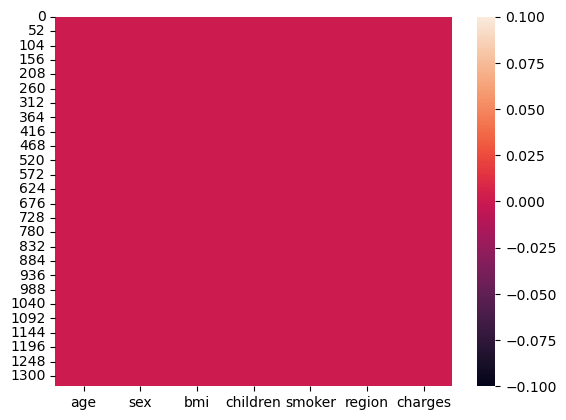

In [101]:
sns.heatmap(df.isnull())

There is no missing data present in the dataset

In [102]:
## Converting Categorical columns to numerical 
df['sex']=df['sex'].map({'female':0,'male':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [103]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [104]:
df['region']=df['region'].map({'southeast':1,'southwest':2,'northeast':3,'northwest':4})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


In [105]:
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


1    676
0    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


0    1064
1     274
Name: smoker, dtype: int64


1    364
2    325
4    325
3    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.3

In [106]:
df.nunique().to_frame("No of Unique Values")

,No of Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


The No.of unique values in target variable is 1337 and no. of rows in the dataset is 1338 so this problem can be considered as Regression problem

In [107]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


since count is same for all the columns so there are no null values present in our dataset The mean is greater than median(50%)for all the columns so data is skewed to right for all columns There is moderate differnce between 75% and max values of age and bmi this indicates outliers present in the dataset which will be removed later

1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: charges, Length: 1337, dtype: int64


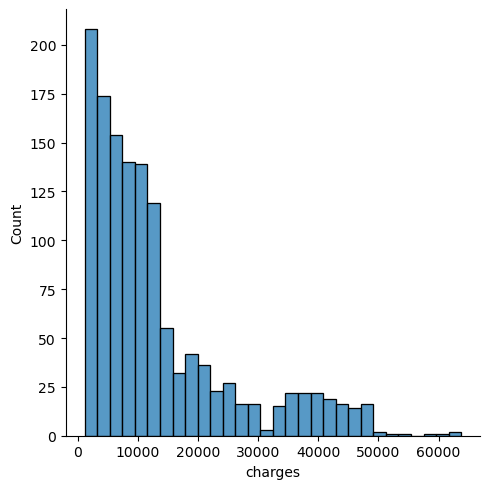

In [108]:
ax=sns.displot(x="charges",data=df)
print(df["charges"].value_counts())

1    364
2    325
4    325
3    324
Name: region, dtype: int64


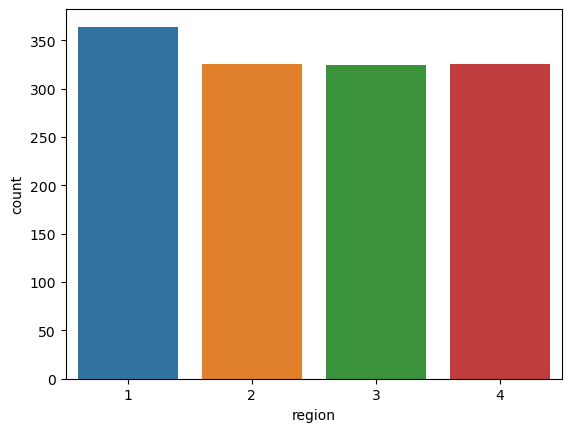

In [109]:
ax=sns.countplot(x="region",data=df)
print(df["region"].value_counts())

Here we observe the people with health insurance are almost equally distributed in all regions

0    1064
1     274
Name: smoker, dtype: int64


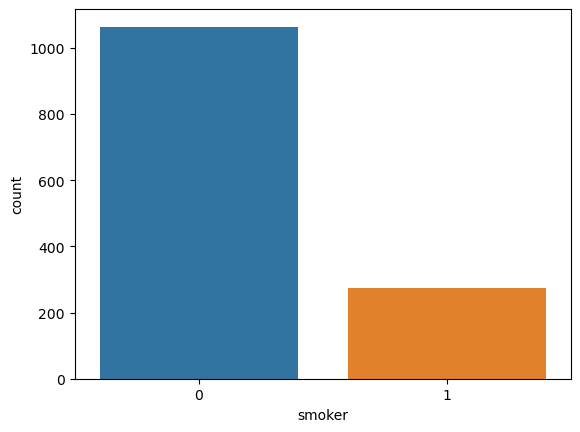

In [110]:
ax=sns.countplot(x="smoker",data=df)
print(df["smoker"].value_counts())

Here we observe the people with health insurance are mostly non-smokers

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


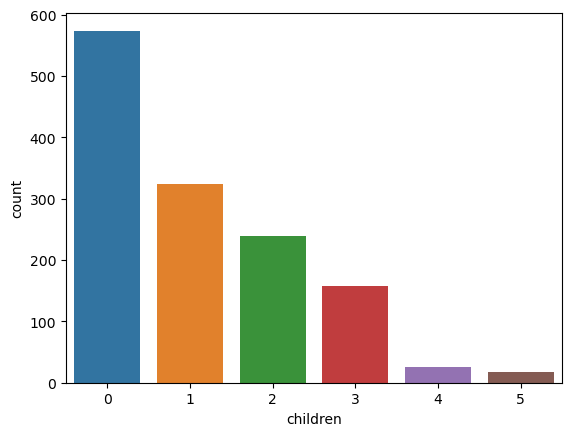

In [111]:
ax=sns.countplot(x="children",data=df)
print(df["children"].value_counts())

Here we observe the dependents of health insurance are mostly adults and less children

32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


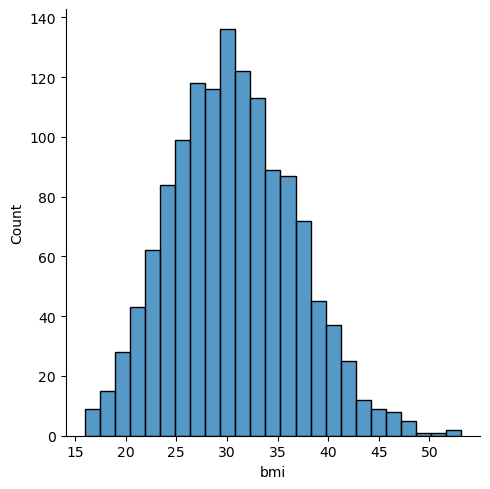

In [112]:
ax=sns.displot(x="bmi",data=df)
print(df["bmi"].value_counts())

1    676
0    662
Name: sex, dtype: int64


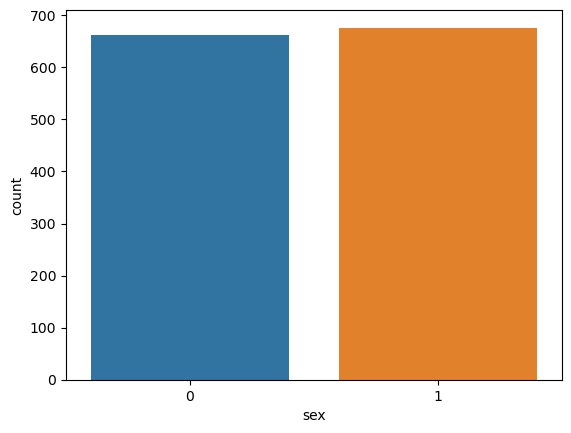

In [113]:
ax=sns.countplot(x="sex",data=df)
print(df["sex"].value_counts())

The ratio of male female taking the health insurance is almost same

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


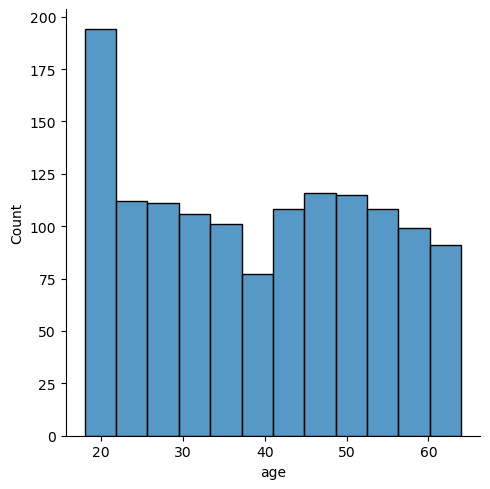

In [114]:
ax=sns.displot(x="age",data=df)
print(df["age"].value_counts())

Here we can see the people taking health insurance are mostly of age between 20-25

In [115]:
cor=df.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.005212,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.016121,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.261829,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.019257,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.053930,0.787251
region,0.005212,-0.016121,-0.261829,0.019257,-0.053930,1.000000,-0.056993
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.056993,1.000000


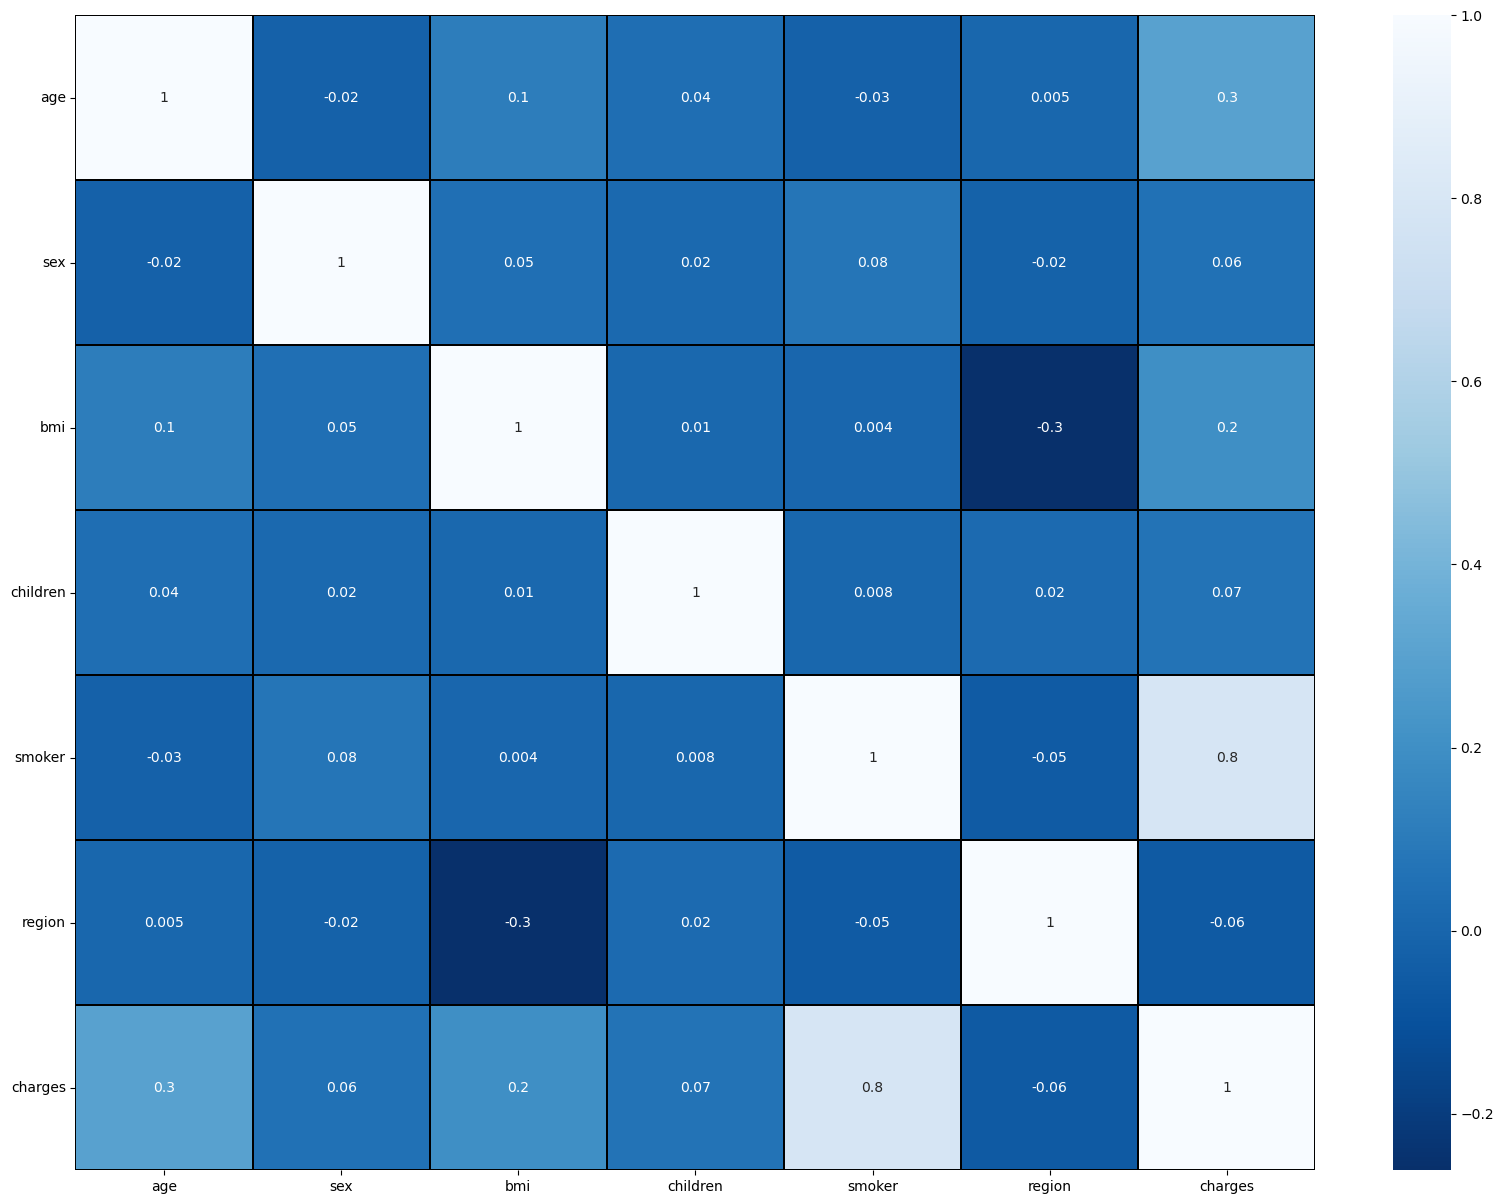

In [116]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt="0.1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

From the heatmap we observe that independent variables are not correlated with each other hence there is no multicollinearity present in the dataset

In [117]:
cor['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.056993
Name: charges, dtype: float64

We can see positive and negative correlated features with the target

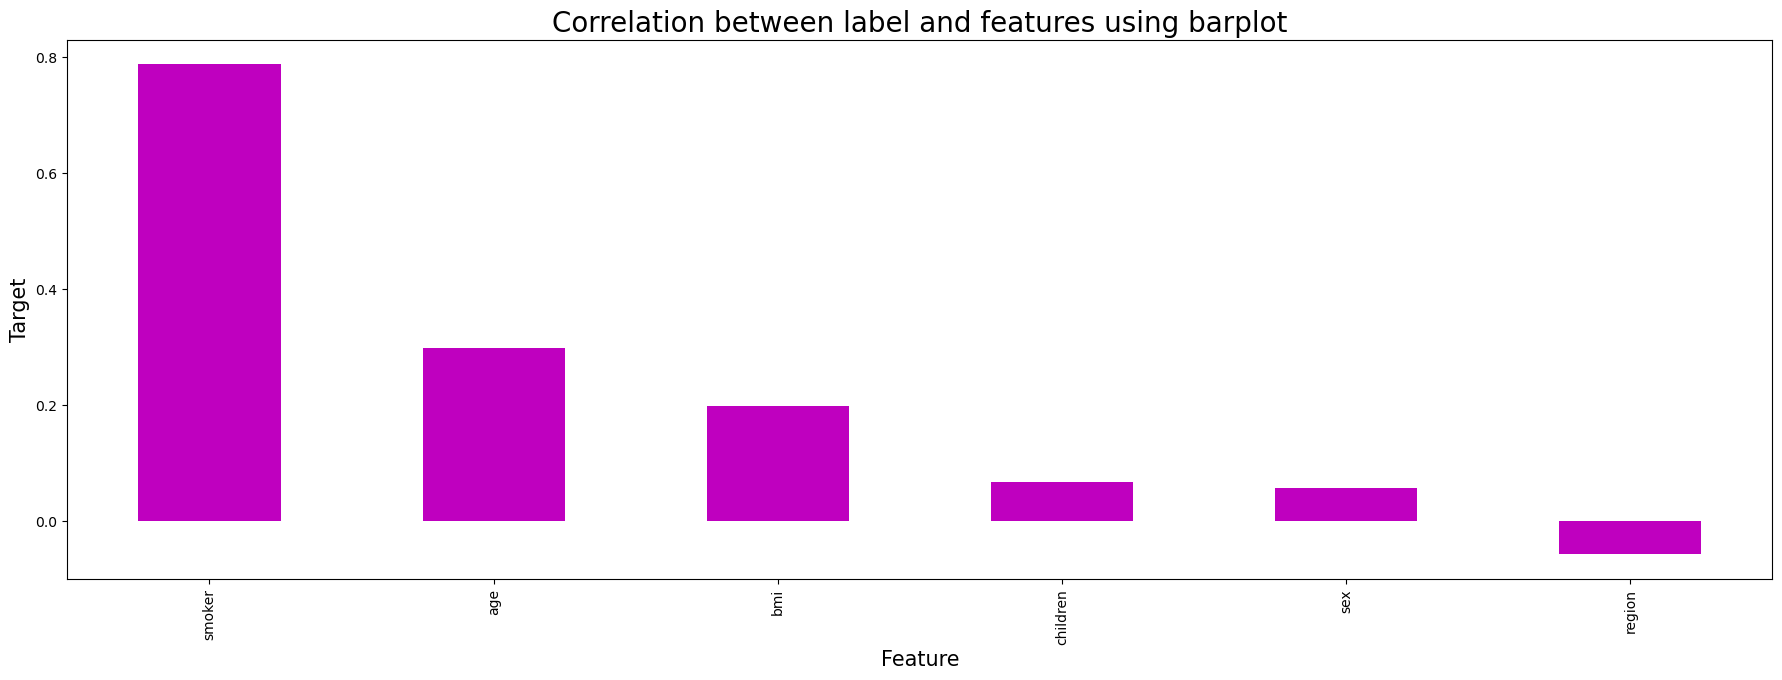

In [118]:
plt.figure(figsize=(22,7))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind="bar",color="m")
plt.xlabel("Feature",fontsize=15)
plt.ylabel("Target",fontsize=15)
plt.title("Correlation between label and features using barplot",fontsize=20)
plt.show()

From the above barplot it is clear that smoker and age are highly correlated and region and sex are very less coorelated with the target variable

In [119]:
x=df.drop('charges',axis=1)
y=df['charges']

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [121]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=112)

In [122]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [126]:
LR=LinearRegression()
LR.fit(x_train,y_train)
pred1=LR.predict(x_test)
pred2=LR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred1)*100)
print('R2_score on training data: ',r2_score(y_train,pred2)*100)

R2_score for test data:  80.25955251974226
R2_score on training data:  72.54238562781875


In [127]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred3=RFR.predict(x_test)
pred4=RFR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred3)*100)
print('R2_score on training data: ',r2_score(y_train,pred4)*100)

R2_score for test data:  89.61605881384625
R2_score on training data:  97.1473965220075


In [128]:
GBR=GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred5=GBR.predict(x_test)
pred6=GBR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred5)*100)
print('R2_score on training data: ',r2_score(y_train,pred6)*100)

R2_score for test data:  91.14653053235142
R2_score on training data:  89.28558481793577


In [129]:
ls=Lasso()
ls.fit(x_train,y_train)
pred7=ls.predict(x_test)
pred8=ls.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred7)*100)
print('R2_score on training data: ',r2_score(y_train,pred8)*100)

R2_score for test data:  80.26177346485998
R2_score on training data:  72.54237658738383


In [130]:
rd=Ridge()
rd.fit(x_train,y_train)
pred_1=rd.predict(x_test)
pred_2=rd.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_1)*100)
print('R2_score on training data: ',r2_score(y_train,pred_2)*100)

R2_score for test data:  80.26340558036648
R2_score on training data:  72.53952309824147


In [131]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred_3=DTR.predict(x_test)
pred_4=DTR.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_3)*100)
print('R2_score on training data: ',r2_score(y_train,pred_4)*100)

R2_score for test data:  78.65136447560135
R2_score on training data:  99.86401505730052


In [132]:
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_5=etr.predict(x_test)
pred_6=etr.predict(x_train)
print('R2_score for test data: ',r2_score(y_test,pred_5)*100)
print('R2_score on training data: ',r2_score(y_train,pred_6)*100)

R2_score for test data:  88.13607014340826
R2_score on training data:  99.86401505730052


In [133]:
from sklearn.model_selection import cross_val_score

In [134]:
score=cross_val_score(LR,x,y,cv=3,scoring='r2')
print(score)
print(score.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred1)-score.mean())*100)

[0.75241617 0.75571265 0.72770185]
0.7452768919839322
Difference between R2 score and cross validation score is:  5.73186332134904


In [135]:
score1=cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred3)-score1.mean())*100)

[0.8498051  0.77930041 0.87447298 0.83191074 0.8522381 ]
0.8375454651053674
Difference between R2 score and cross validation score is:  5.861512303309513


In [136]:
score2=cross_val_score(GBR,x,y)
print(score2)
print(score2.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred5)-score2.mean())*100)

[0.87634418 0.79542211 0.89166146 0.85236497 0.85890474]
0.854939491872717
Difference between R2 score and cross validation score is:  5.652581345079721


In [137]:
score3=cross_val_score(ls,x,y)
print(score3)
print(score3.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred7)-score3.mean())*100)

[0.76259582 0.70686026 0.77681383 0.7319487  0.75695367]
0.7470344583955574
Difference between R2 score and cross validation score is:  5.5583276253042495


In [139]:
score4=cross_val_score(rd,x,y)
print(score4)
print(score4.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_1)-score4.mean())*100)

[0.76273097 0.70720204 0.77618076 0.73229281 0.75671067]
0.7470234492748917
Difference between R2 score and cross validation score is:  5.561060652877304


In [140]:
score5=cross_val_score(DTR,x,y)
print(score5)
print(score5.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_3)-score5.mean())*100)

[0.72744619 0.68836669 0.69779259 0.727378   0.72316138]
0.7128289709510126
Difference between R2 score and cross validation score is:  7.368467380500087


In [141]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print("Difference between R2 score and cross validation score is: ",(r2_score(y_test,pred_5)-score6.mean())*100)

[0.83689295 0.75159354 0.8504996  0.81202594 0.84113308]
0.8184290224206311
Difference between R2 score and cross validation score is:  6.293167901345154


From the above Regressors both lasso and Ridge as my best model as the cross validation score is minimum for both cross_val_scorefor both is very close to each other therfore I slect Ridge as my best Model

In [143]:
from sklearn.model_selection import GridSearchCV

In [144]:
params={'alpha':[1.0,0.05,.4,2], 
        'fit_intercept':[True,False], 
        'solver':['auto','svd','cholesky','lsqr','saga','lbfgs'], 
        'positive':[False,True],
        'random_state':[1,4,10,20], 
       }
gscv=GridSearchCV(Ridge(),params,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1.0, 0.05, 0.4, 2],
                         'fit_intercept': [True, False],
                         'positive': [False, True],
                         'random_state': [1, 4, 10, 20],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga',
                                    'lbfgs']})

In [145]:
gscv.best_params_

{'alpha': 1.0,
 'fit_intercept': True,
 'positive': True,
 'random_state': 1,
 'solver': 'auto'}

In [146]:
Model = Ridge(alpha=1.0,fit_intercept=True,positive=True,random_state=1,solver='auto')

In [147]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
Regressor = Model.fit(x_train, y_train)
mod_pred = Model.predict(x_test)
mod_acc = (r2_score(y_test, mod_pred))*100
print("R2 score for the Best Model is:", mod_acc)


R2 score for the Best Model is: 80.31206592709546


As seen R2_score on test and training data for Ridge was :
0.8026340558036648 and 72.53952309824147   
And R2_score on test and training data for Ridge now is: 80.31206592709546   
we have successfully tuned our model for highest accuracy

In [150]:
import joblib
joblib.dump(Model, "Insurance_Cost_Prediction_Analysis.pkl")

['Insurance_Cost_Prediction_Analysis.pkl']

In [151]:
model = joblib.load("Insurance_Cost_Prediction_Analysis.pkl")
prediction=Model.predict(x_test)
prediction

array([14399.71734482,  8719.75449373, 27450.81954523, 34546.64352496,
       34655.44073556,  9985.47871302,  7862.87112918, 31191.58536437,
        7747.81911651,  2122.84887499,  7516.50179692, 12909.91385416,
       12132.89999568, 26102.34049955, 11319.52845472,  1385.12339378,
       12524.65694681, 14220.66039097, 14149.5518575 , 11146.97154465,
       32227.32561797, 10730.2755151 ,  2344.62069545, 38944.24833175,
        1880.07147885, 11275.61724694,  3511.59496952,  8386.97885108,
        2171.45908925,  5525.13596469, 16821.98161907, 15893.85056582,
       11769.29281487,  7331.70162895,  3691.29224506, 34546.1625929 ,
       13226.37358092, 11668.59925017, 26881.11802236, 10553.9490665 ,
       14468.43984022,  4451.89325031, 36975.87741062,  5291.70655968,
       12598.00684728, 26535.64810194, 11969.28704519,  8764.50656303,
        6263.05089164,  8873.66390064,  -518.54323914,  8082.62678749,
       14074.3281795 , 14245.78178377,  5086.57246619, 14889.47400385,
      

In [152]:
p=np.array(y_test)
df=pd.DataFrame()
df["Predicted"] = prediction
df["Original"] = p
df

,Predicted,Original
0,14399.717345,11090.71780
1,8719.754494,8017.06115
2,27450.819545,34617.84065
3,34546.643525,24535.69855
4,34655.440736,23967.38305
...,...,...
397,10556.455910,5972.37800
398,7935.854785,5245.22690
399,12610.514236,6948.70080
400,1176.660691,2680.94930


In [153]:
conclusion=pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,392,393,394,395,396,397,398,399,400,401
Predicted,14399.717345,8719.754494,27450.819545,34546.643525,34655.440736,9985.478713,7862.871129,31191.585364,7747.819117,2122.848875,...,7165.963542,28026.762694,11078.947051,6031.948158,12162.524159,10556.45591,7935.854785,12610.514236,1176.660691,1594.049278
Original,11090.717800,8017.061150,34617.840650,24535.698550,23967.383050,8059.679100,8252.284300,20745.989100,5253.524000,1719.436300,...,7046.722200,36307.798300,13415.038100,6402.291350,9866.304850,5972.37800,5245.226900,6948.700800,2680.949300,1969.614000
